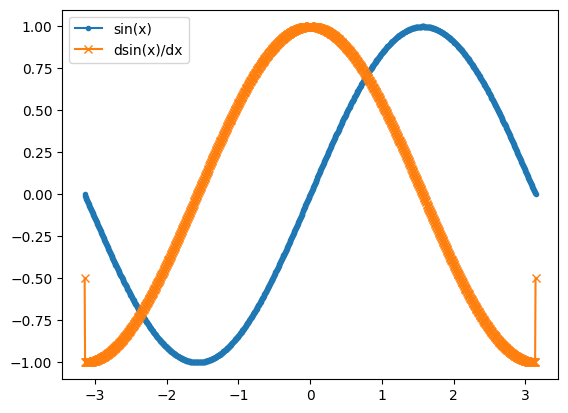

In [1]:
import sys, copy
sys.path.append('../tools')
import sincos as sc
import plot_utility as ptut
import matplotlib.pyplot as plt
import numpy as np
import differential as dff
import npmps

if __name__ == '__main__':
    N = 10
    x1,x2 = -np.pi,np.pi

    fig, ax = plt.subplots()

    # sin function
    f = sc.sin_mps (N, x1, x2)
    ptut.plot_1D(f, x1, x2, ax=ax, marker='.', label='sin(x)')

    # first derivative
    d = dff.diff_MPO(N, x1, x2)
    df = npmps.exact_apply_MPO(d, f)
    npmps.check_MPS_links (df)
    ptut.plot_1D(df, x1, x2, ax=ax, marker='x', label='dsin(x)/dx')

    plt.legend()
    plt.show()

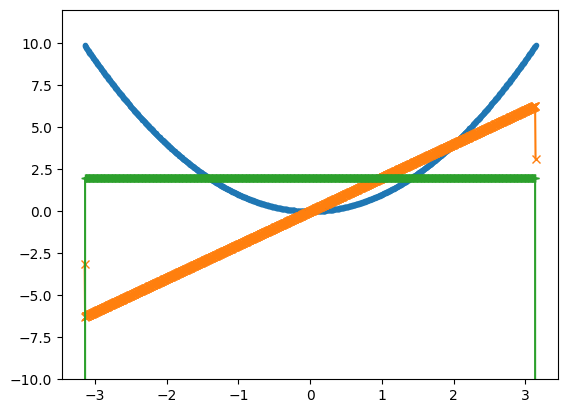

In [2]:
import sys, copy
sys.path.append('../tools')
import polynomial as pn
import plot_utility as ptut
import matplotlib.pyplot as plt
import numpy as np
import differential as dff
import npmps

if __name__ == '__main__':
    N = 10
    x1,x2 = -np.pi,np.pi

    fig, ax = plt.subplots()

    # x^2 function
    f = pn.make_xsqr_mps (N, x1, x2)
    ptut.plot_1D(f, x1, x2, ax=ax, marker='.')

    # first derivative
    d = dff.diff_MPO(N, x1, x2)
    df = npmps.exact_apply_MPO(d, f)
    npmps.check_MPS_links (df)
    ptut.plot_1D(df, x1, x2, ax=ax, marker='x')

    # second derivative
    d2 = dff.diff2_MPO(N, x1, x2)
    d2f = npmps.exact_apply_MPO(d2, f)
    npmps.check_MPS_links (d2f)
    ptut.plot_1D(d2f, x1, x2, ax=ax, marker='+')

    plt.ylim(-10,12)
    plt.show()

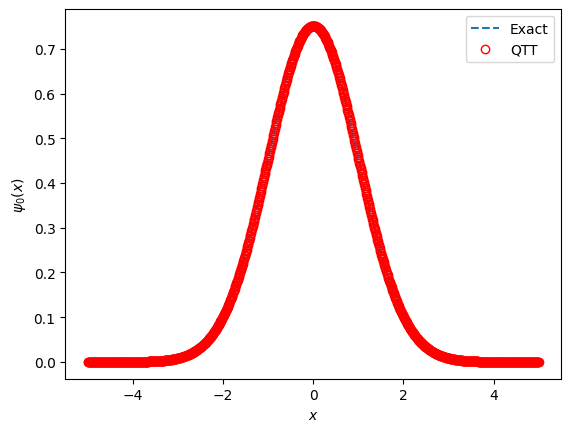

In [3]:
import sys
sys.path.append('../tools')
import numpy_dmrg as dmrg
import numpy as np
import matplotlib.pyplot as plt
import polynomial as poly
import differential as diff
import npmps
import plot_utility as ptut
import hamilt.hamilt_sho as sho
import qtt_tools as qtt

if __name__ == '__main__':
    fig, ax = plt.subplots()
    sho.plot_GS_exact(-4,4,ax,ls='--',label='Exact')
    
    N = 10
    x1,x2 = -5,5
    shift = 0

    H = sho.make_H (N, x1, x2, shift=shift)
    psi = npmps.random_MPS (N,2,2)

    # Define the bond dimensions for the sweeps
    nsweep = 4
    maxdims = [2]*nsweep + [4]*nsweep + [8]*nsweep + [16]*nsweep + [32]*nsweep
    cutoff = 1e-12

    psi0, ens0, terrs0 = dmrg.dmrg (2, psi, H, maxdims, cutoff)

    # Plot
    psi0 = qtt.normalize_MPS_by_integral (psi0, x1, x2, Dim=1)
    ptut.plot_1D(psi0, x1, x2, ax=ax, marker='o', mfc='None', ls='None', label='QTT', c='r', func=abs)
    plt.xlabel('$x$')
    plt.ylabel('$\psi_0(x)$')
    
    plt.legend()
    plt.show()

In [1]:
import sys
sys.path.append('tools')
import numpy_dmrg as dmrg
import numpy as np
import matplotlib.pyplot as plt
import polynomial as poly
import differential as diff
import npmps
import plot_utility as ptut
import hamilt.hamilt_sho as sho
import qtt_tools as qtt
from matplotlib import animation
from IPython.display import HTML

if __name__ == '__main__':
    N = 8
    x1,x2 = -10,10
    shift = 3

    H = sho.make_H (N, x1, x2, shift=shift)
    psi = npmps.random_MPS (N,2,2)

    # Define the bond dimensions for the sweeps
    nsweep = 4
    maxdims = [2]*nsweep + [4]*nsweep + [8]*nsweep + [16]*nsweep
    cutoff = 1e-12

    psi, ens0, terrs0 = dmrg.dmrg (2, psi, H, maxdims, cutoff)

    dt = 0.1
    Nsteps = 80
    H = sho.make_H (N, x1, x2, shift=0)
    H = npmps.change_dtype(H, complex)
    psi = npmps.change_dtype(psi, complex)
    for i in range(1,Nsteps+1):
        psi, ens, terrs = dmrg.tdvp (2, psi, H, 1j*dt, maxdims=[32], cutoff=cutoff)
    
        # Plot
        fig, ax = plt.subplots()
        ptut.plot_1D_mpo (H, x1, x2, ax)
        ax = ax.twinx()
        psi = qtt.normalize_MPS_by_integral (psi, x1, x2, Dim=1)
        ax, xs, ys = ptut.plot_1D(psi, x1, x2, ax=ax, ls='-', c='k', func=abs)
        ax.set_ylim(0,1)
        fig.savefig('f'+str(i).zfill(2)+'.jpg')
        plt.close(fig)

/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/

/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/chiamin/.local/lib/python3.10/site-packages/